# Assignment- Linear Regression
## Problem Statement

A Chinese automobile company **Geely Auto** aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an **automobile consulting company** to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

 - Which variables are significant in predicting the price of a car
 - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

**Business Goal**

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 


**Data Preparation**

There is a variable named **CarName** which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has **'chevrolet'** as the car company name and **'impala'** as the car model name. You need to consider only company name as the independent variable for model building. 
 

**Model Evaluation:**

When you're done with model building and residual analysis, and have made predictions on the test set, just make sure you use the following two lines of code to calculate the **R-squared score on the test set**.

#### Developer Name: Gaurav Sham Desurakar

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

import statsmodels.api as sm 

from sklearn.feature_selection import RFE


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#import Data
df_car = pd.read_csv("D:\\Upgrad\\Linear Regression\\Assignment-LinearRegression\\CarPrice_Assignment.csv")

In [3]:
# Shape of data
print("Total number of records:",df_car.shape[0])
print("Total number of fields:",df_car.shape[1])


Total number of records: 205
Total number of fields: 26


In [4]:
#Glimpe of data
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Check datatype of fields and null fields
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
print("Data does not have any null values. However checking the same again with other command.")
if df_car.isnull().values.any() == False:
    print("Null does not exist in data frame")
else:
    print("Null exist in data frame")

Data does not have any null values. However checking the same again with other command.
Null does not exist in data frame


### Exploratory Data Analysis

#### Splitting CarName, - Informed in problem statement

In [7]:
#CarName: Split into Brand Name and Model Name
df_car['CompanyName'] = df_car['CarName'].str.split(' ', expand=True)[0]
df_car['ModelName1'] = df_car['CarName'].str.split(' ', expand=True)[1]
df_car['ModelName2'] = df_car['CarName'].str.split(' ', expand=True)[2]
df_car['ModelName3'] = df_car['CarName'].str.split(' ', expand=True)[3]
df_car['ModelName4'] = df_car['CarName'].str.split(' ', expand=True)[4]

In [8]:
# ModelName2 - Checking Unique values
df_car['ModelName2'].unique()

array([None, 'ls', '(diesel)', 'carlo', '2300', 'se', '(sw)', 'hardtop',
       'custom', 'cvcc', 'lx', '1500', '1300', '(auto)', '', 'V-Cross',
       'deluxe', 'coupe', 'gs', '4', '225', 'luxus', 'isuzu', 'special',
       'sport', 'g4', 'turbo', 'iii', 'gran', 'gtl', 'mark', '1200',
       '1600', 'ii', 'liftback', 'gt', 'tercel', '111', '3', 'beetle'], dtype=object)

In [9]:
# ModelName3 - Checking Unique values
df_car['ModelName3'].unique()

array([None, '(sw)', 'gl', 'l', 'custom', 'deluxe', 'coupe', 'diesel',
       'sedan', 'ii', 'liftback'], dtype=object)

In [10]:
# ModelName4 - Checking Unique values
df_car['ModelName4'].unique()

array([None, '(turbo)'], dtype=object)

In [11]:
print("ModelName1 Missing value %:",1- df_car['ModelName1'].value_counts().sum()/len(df_car))
print("ModelName2 Missing value %:",1- df_car['ModelName2'].value_counts().sum()/len(df_car))
print("ModelName3 Missing value %:",1- df_car['ModelName3'].value_counts().sum()/len(df_car))
print("ModelName4 Missing value %:",1- df_car['ModelName4'].value_counts().sum()/len(df_car))

ModelName1 Missing value %: 0.009756097560975618
ModelName2 Missing value %: 0.673170731707317
ModelName3 Missing value %: 0.9317073170731707
ModelName4 Missing value %: 0.9951219512195122


In [12]:
# Since ModelName2 , ModelName3 and ModelName4 has more null values hence it is better to drop Or merge with model1 field.
df_car = df_car.drop(['ModelName2', 'ModelName3','ModelName4'], axis=1)

#Also droping original CarName field
df_car = df_car.drop(['CarName'], axis=1)

In [13]:
df_car.shape

(205, 27)

#### Checking car company name

In [14]:
df_car.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Seems there are few spelling mistakes in car company name. Needs to fix them

In [15]:
df_car.CompanyName.replace('maxda','mazda',inplace=True)
df_car.CompanyName.replace('porcshce','porsche',inplace=True)
df_car.CompanyName.replace('Nissan','nissan',inplace=True)
df_car.CompanyName.replace('toyouta','toyota',inplace=True)
df_car.CompanyName.replace('vokswagen','volkswagen',inplace=True)
df_car.CompanyName.replace('vw','volkswagen',inplace=True)


In [16]:
df_car.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Understanding the Targer variable i.e. Price

The cheapest car sold for $5,118 and the most expensive for $45,400
The average car price is $13,277, while median is $10,295


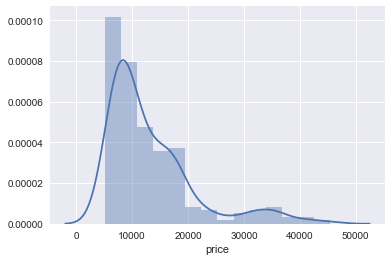

In [17]:
print('The cheapest car sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    df_car.price.min(), df_car.price.max()))
print('The average car price is ${:,.0f}, while median is ${:,.0f}'.format(
    df_car.price.mean(), df_car.price.median()))

sns.distplot(df_car.price)

In [18]:
df_car.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

#### Inference on Price variable
- Distribution of price are **Right Skewed**
- 75% Data points are below 16503
- Difference between Mean and Median, which means data is not normally distributed.


#### Highest Selling Car Company

[Text(0,0.5,'No. of Cars'), Text(0.5,0,'Company')]

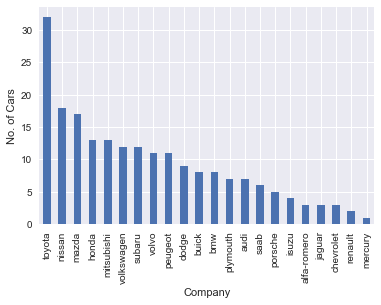

In [19]:
barplot = df_car.CompanyName.value_counts().plot('bar')
barplot.set(xlabel = 'Company', ylabel='No. of Cars')

#### Inference:
- Toyota is the most selling car in USA

#### Creating Numeric and Categorical dataframe

In [20]:
# Finding numerical features
numeric_data = df_car.select_dtypes(include = [np.number])

# Finding categorical features
categorical_data = df_car.select_dtypes(exclude = [np.number])

In [21]:
print("Total Numeric variable:",numeric_data.shape[1])
print("Total Categorical variable:",categorical_data.shape[1])

Total Numeric variable: 16
Total Categorical variable: 11


In [22]:
numeric_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Identify fields which contains same value

In [23]:
#Identify fields which contains same value
rm_vars = []
for column in numeric_data:
    if len(numeric_data[column].unique())==1:
        rm_vars.append(column)
        
print("List of fields contains same value:",rm_vars)

List of fields contains same value: []


#### Identify numeric categorical variable

In [24]:
# Need to treat them separately
num_cat_vars = []
for column in numeric_data:
    if len(numeric_data[column].value_counts())<=10:
        num_cat_vars.append(column)

print("List of numeric categorical fields:",num_cat_vars)

List of numeric categorical fields: ['symboling']


In [25]:
#Analysis of symboling field
numeric_data.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [26]:
#symboling field - removing from numeric_data and adding tin cateorical_data
numeric_data = numeric_data.drop(['symboling'], axis=1)

In [27]:
#Adding symboling var into categorical dataset
categorical_data = pd.concat([categorical_data, df_car.symboling], axis=1, join='inner')

### Outliers Treatment

##### Distribution of numeric variables

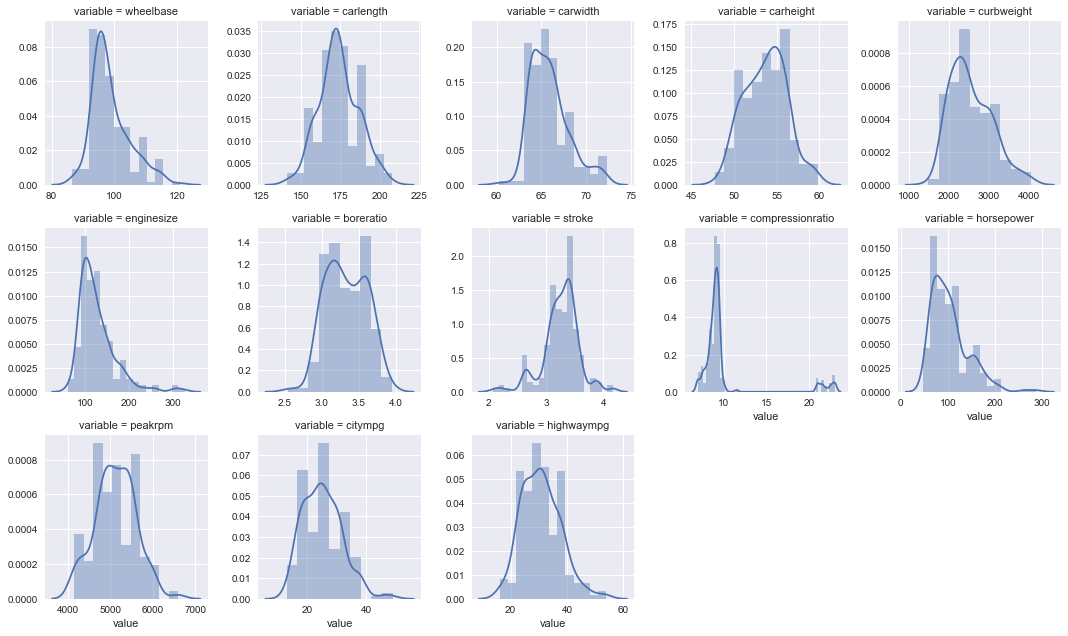

In [28]:
f = pd.melt(numeric_data[['wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
        )
g = sns.FacetGrid(f, col='variable', col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

##### Price v/s Numeric features

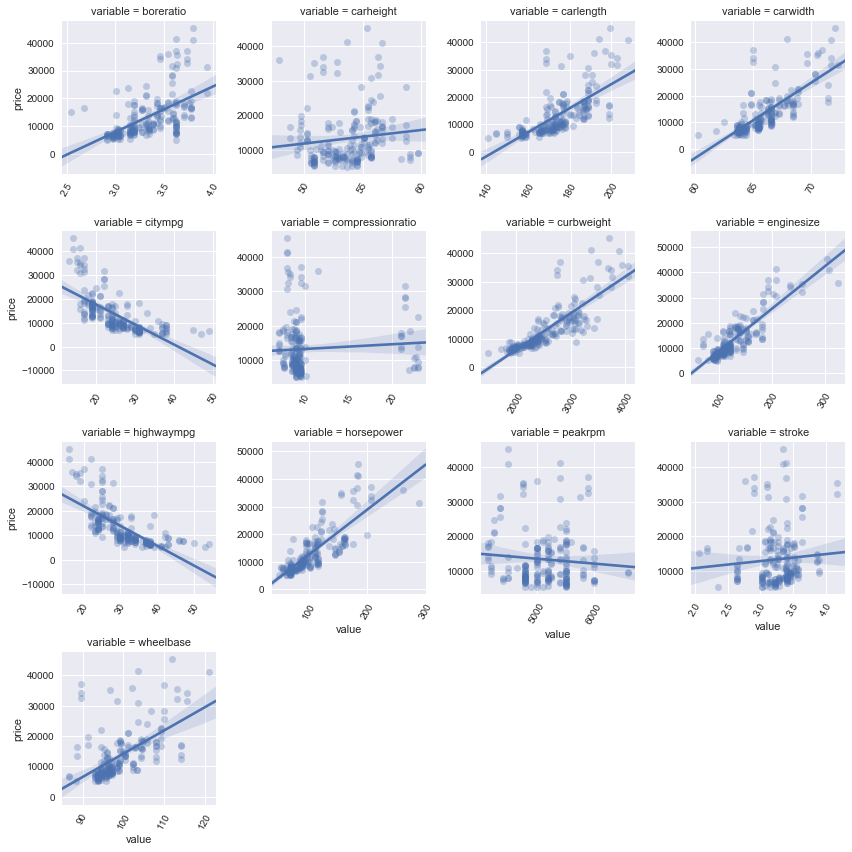

In [29]:
num_features = numeric_data.drop(['car_ID','price'],1)

f = pd.melt(numeric_data, id_vars=['price'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'price', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

#### Analysis of Price v/s Numeric features based on above graph(regplot)
1. **Price v/s boreratio:**
    There is positive moderate correlation between price and boreratio.There are few outliers are avaialble.
2. **Price v/s carheight:**
    There is no relation between price and car height. So many outliers are available, need to treat them.
3. **Price v/s carlength:**
    Positive correlation between price and length of car. However outliers are available and need to treat them.
4. **Price v/s carwidth:**
    Positive correlation between price and width of car. However outliers are available and need to treat them.
5. **Price v/s citympg:**
    Negative correlation between price and citympg. Higher the price lower milege of car. However outliers are available and need to treat them.
6. **Price v/s compressionration:**
    No relation between these two variables. Outliers are avaiable need to treat them.
7. **Price v/s curbweight:**
   High positive correlation between price and curbweight.Few outliers are avaiable.
8. **Price v/s enginesize:**
   High positive correlation between price and enginesize. No outliers are avaiable.
9. **Price v/s Highwaympg:**
   High negative correlation between price and highwaympg. Outliers are avaialble need to treat them.
10. **Price v/s horsepower:**
    High positive correlation between price and horsepower. Few outliers are available.
11. **Price v/s peakrpm:**
    No correlation between price and peakrpm. Outliers are available, neet to treat them.
12. **Price v/s stroke:**
    No correlation between price and stroke. Outliers are available, neet to treat them.      
13. **Price v/s wheelbase:**
    High positive correlation between price and wheelbase. Outliers are available, neet to treat them.  


#### Replacing Outliers with median as we have very less records instead of removing outliers

In [30]:
#Replacing outliers with median
for column in num_features:
    quartile_1, quartile_3 = np.percentile(num_features[column], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    #print(lower_bound)
    upper_bound = quartile_3 + (iqr * 1.5)
    #print(upper_bound)
    numeric_data.loc[(numeric_data[column]>upper_bound) | (numeric_data[column]< lower_bound), column] = numeric_data[column].median()


In [31]:
# checking effect of outlier treatment
# Before outlier treatment
numeric_data.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.458537,174.205854,65.665854,53.724878,2555.565854,120.326829,3.329756,3.29400,8.929854,100.209756,5111.463415,24.985366,30.424390,13276.710571
std,59.322565,5.570721,12.118818,1.797331,2.443522,520.680204,28.356891,0.270844,0.20071,0.524056,32.591047,453.934655,6.136901,6.358597,7988.852332
min,1.000000,86.600000,144.600000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.68000,7.500000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.800000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.15000,8.700000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.29000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,101.200000,183.100000,66.500000,55.500000,2935.000000,136.000000,3.580000,3.40000,9.300000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,114.200000,208.100000,70.900000,59.800000,4066.000000,203.000000,3.940000,3.86000,10.100000,184.000000,6000.000000,45.000000,47.000000,45400.000000


#### We can see above, based on standard deviation that outliers has been treated

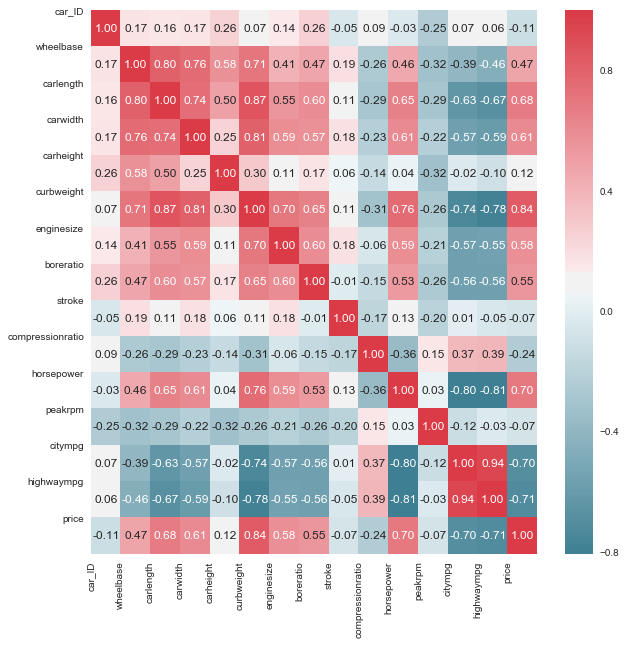

In [32]:
#Create Correlation df
corr = numeric_data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

### Analysis of above correlation matrix

**Highly Negative Correlated fields with Target Variable - Price**
- highwaympg
- citympg

**Highly Positive Correlated fields with Target Variable - Price**
- horsepower

- curbweight

**Moderate Positive Correlated fields with Target Variable - Price**
- wheelbase
- carlength
- carwidth
- enginesize

**Also by seeing above correlation matrix, we can easily understand there are many independant variables are also highly correlated with each other.**

### Handling Categorical variables

In [33]:
categorical_data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CompanyName,ModelName1,symboling
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,giulia,3
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,stelvio,3
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,Quadrifoglio,1
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi,100,2
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi,100ls,2


In [34]:
#Adding price var into categorical dataset
categorical_data = pd.concat([categorical_data, df_car.price], axis=1, join='inner')

#### Box plots of categorical features

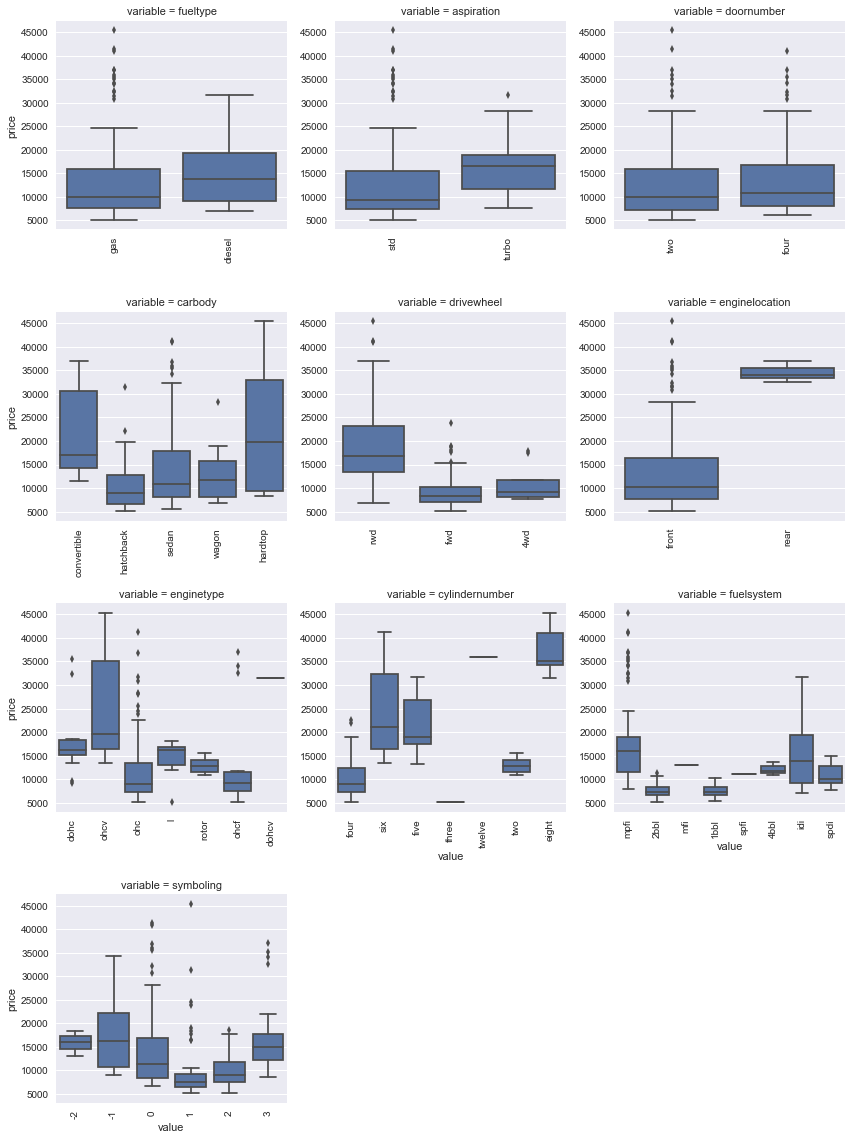

In [35]:

f = pd.melt(categorical_data[categorical_data.columns[~categorical_data.columns.isin(['CompanyName','ModelName1'])]], id_vars=['price'])
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'price')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

#### Count plot of Categorical features

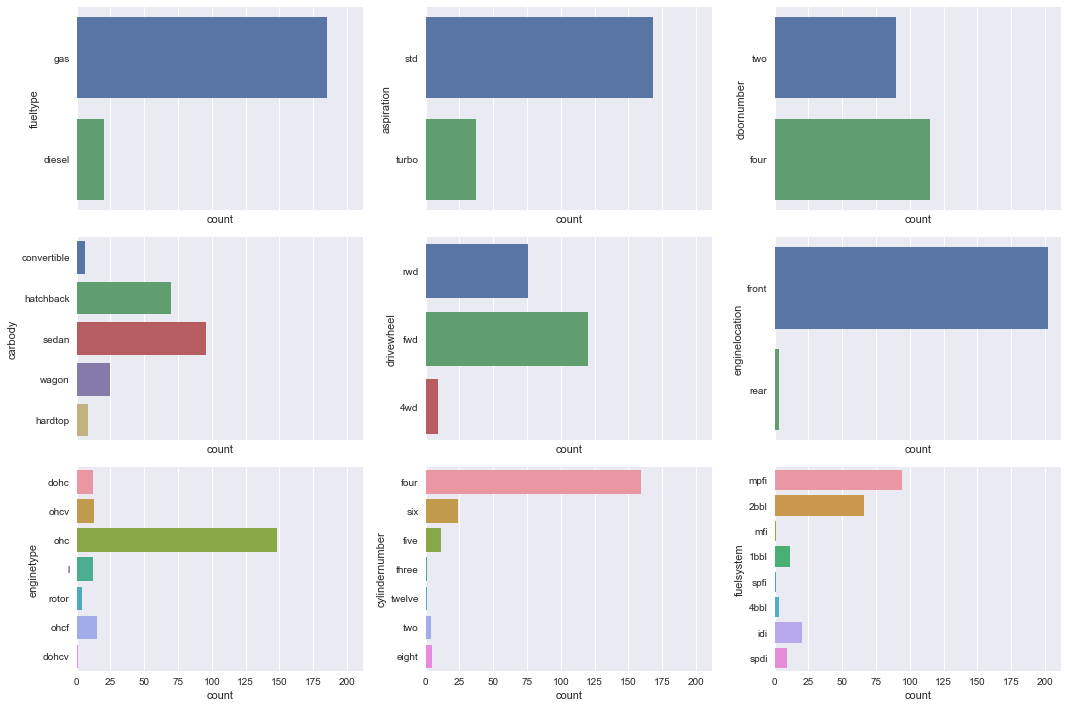

In [36]:
df = categorical_data[categorical_data.columns[~categorical_data.columns.isin(['CompanyName','ModelName1'])]]

fig, axes =plt.subplots(3,3, figsize=(15,10), sharex=True)
axes = axes.flatten()
object_bol = df.dtypes == 'object'
for ax, catplot in zip(axes, df.dtypes[object_bol].index):
    sns.countplot(y=catplot, data=df, ax=ax)

plt.tight_layout()  
plt.show()

#### Inference from above graphs (Box plots and Count Plots)
 - By seeing above graphs, it is clear that few categorical variables has outliers.
 - Fuel type - gas is most prefered
 - Aspitation - std is most prefered
 - Car Body - Sedan is most prefered
 - Drive Wheel - Fwd is most prefered
 - Engine Location - front is most prefered. However price range of 'rear' is higher than 'front'
 - Engine Type - ohc is most prefered
 - Cylinder number - four is most prefered. However price range of 'eight' is higher than other no of cylinders
 - Fuel System - mpfi is most prefered
    

### Feature Engineering

 1. price_range: Creating three levels - economic, medium, luxuries
 2. avg_mpg: Creating average milage of car using 'citympg' and 'highwaympg' field

In [37]:
#price_range
print(categorical_data.price.describe())

#This categorization is based on mean and median and 75% percentile
categorical_data['price_range'] = 'luxuries'
categorical_data.loc[categorical_data['price'] <= 16503 , 'price_range']='medium'
categorical_data.loc[categorical_data['price'] <= 10295 , 'price_range']='economic'


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [38]:
#Distribution of price_range field
categorical_data.groupby(['price_range'])['price'].count()

price_range
economic    103
luxuries     51
medium       51
Name: price, dtype: int64

In [39]:
#avg_mpg
numeric_data['avg_mpg'] = (numeric_data['citympg'] + numeric_data['highwaympg'])/2
numeric_data[['citympg','highwaympg','avg_mpg']].head()

,citympg,highwaympg,avg_mpg
0,21.0,27.0,24.0
1,21.0,27.0,24.0
2,19.0,26.0,22.5
3,24.0,30.0,27.0
4,18.0,22.0,20.0


### Bivariate Analysis

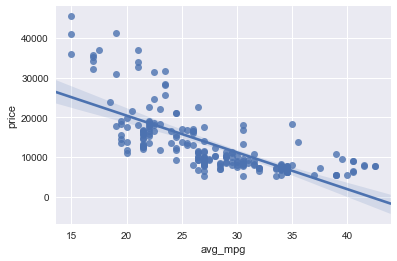

In [40]:
# Price v/s avg_mpg
sns.regplot(numeric_data['avg_mpg'],numeric_data['price'])

#### Inference of above graph
 - Negative correlation between avg_mpg and price of car. Higher the price, lower the avg_mpg

#### One hot encoding of categorical data

In [41]:
cat_data_onehot  = pd.get_dummies(categorical_data[categorical_data.columns[~categorical_data.columns.isin(['CompanyName','ModelName1','price'])]], drop_first=True)

#### Merging Numeric and Categorical data

In [42]:
cat_data_onehot.head(3)

,symboling,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price_range_luxuries,price_range_medium
0,3,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,3,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,1,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [43]:
numeric_data.head(3)

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avg_mpg
0,1,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,24.0
1,2,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,24.0
2,3,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,22.5


In [44]:
categorical_data.head(3)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CompanyName,ModelName1,symboling,price,price_range
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,giulia,3,13495.0,medium
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero,stelvio,3,16500.0,medium
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero,Quadrifoglio,1,16500.0,medium


In [45]:
print(cat_data_onehot.shape)
print(numeric_data.shape)
print(categorical_data.shape)

(205, 32)
(205, 16)
(205, 14)


In [46]:
#Dropping CarId var
df_num = numeric_data[numeric_data.columns[~numeric_data.columns.isin(['car_ID'])]]

#Merging dataframe
cat_data_onehot = pd.concat([cat_data_onehot, df_num], axis=1, join='inner')

In [47]:
# Final Attributes for model
df_final = cat_data_onehot
df_final.columns

Index(['symboling', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'price_range_luxuries',
       'price_range_medium', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'avg_mpg'],
      dtype='object')

In [48]:
df_final.head()

,symboling,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avg_mpg
0,3,1,0,1,0,0,0,0,0,1,...,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,24.0
1,3,1,0,1,0,0,0,0,0,1,...,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,24.0
2,1,1,0,1,0,1,0,0,0,1,...,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,22.5
3,2,1,0,0,0,0,1,0,1,0,...,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,27.0
4,2,1,0,0,0,0,1,0,0,0,...,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,20.0


### Splitting the Data into Training and Testing Sets

In [49]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(100)
df_train, df_test = train_test_split(df_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [50]:
print("Trainingd data set:",df_train.shape)
print("Testing data set",df_test.shape)

Trainingd data set: (143, 47)
Testing data set (62, 47)


#### Min max scalling of numeric variables

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train[df_num.columns] = scaler.fit_transform(df_train[df_num.columns])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [52]:
df_train[df_num.columns].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avg_mpg
122,0.257246,0.391379,0.330189,0.265487,0.272692,0.260563,0.230159,0.466102,0.76,0.149254,0.729730,0.56250,0.700000,0.068818,0.709091
125,0.286232,0.418966,0.754717,0.212389,0.500388,0.633803,1.000000,0.364407,0.80,0.708955,0.729730,0.18750,0.333333,0.466890,0.290909
166,0.286232,0.415517,0.349057,0.424779,0.314973,0.260563,0.444444,0.338983,0.76,0.477612,0.567568,0.40625,0.400000,0.122110,0.454545
1,0.072464,0.417241,0.358491,0.088496,0.411171,0.485915,0.626984,0.000000,0.60,0.470149,0.459459,0.25000,0.333333,0.314446,0.327273
199,0.641304,0.762069,0.650943,0.858407,0.647401,0.485915,0.746032,0.398305,0.00,0.850746,0.513514,0.12500,0.166667,0.382131,0.163636


In [53]:
df_train.describe()

,symboling,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avg_mpg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.797203,0.909091,0.181818,0.440559,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,...,0.406678,0.497946,0.516001,0.570406,0.376996,0.524476,0.376748,0.446853,0.219310,0.462937
std,1.195999,0.288490,0.387050,0.498199,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,...,0.204149,0.207140,0.166856,0.207660,0.235776,0.251422,0.191664,0.207196,0.215682,0.220451
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.253521,0.305556,0.415254,0.480000,0.164179,0.351351,0.187500,0.266667,0.067298,0.272727
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.345070,0.500000,0.516949,0.600000,0.343284,0.567568,0.375000,0.433333,0.140343,0.436364
75%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.514085,0.682540,0.610169,0.742000,0.492537,0.729730,0.531250,0.566667,0.313479,0.618182
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Building

In [54]:
# Create X and y train
y_train = df_train.price
X_train = df_train[df_train.columns[~df_train.columns.isin(['price'])]]

In [55]:
#linear regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

#Fit the ,model on training data
lm.fit(X_train,y_train)

#Feature selection
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)


In [56]:
#Checking features and its ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 30),
 ('fueltype_gas', False, 23),
 ('aspiration_turbo', False, 22),
 ('doornumber_two', False, 29),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 11),
 ('drivewheel_rwd', False, 10),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 25),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 26),
 ('enginetype_ohcv', False, 14),
 ('enginetype_rotor', False, 9),
 ('cylindernumber_five', False, 20),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 2),
 ('cylindernumber_three', False, 5),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', True, 1),
 ('fuelsystem_2bbl', False, 18),
 ('fuelsystem_4bbl', False, 8),
 ('fuelsystem_idi', False, 6),
 ('fuelsystem_mfi', False, 31),
 ('fuelsystem_mpfi', False, 19),
 ('fuelsystem_spdi', False, 21),
 ('fuelsystem_spfi', False, 32),
 ('price_range_luxuries

In [57]:
#Below are the top ten predictors 
X_train.columns[rfe.support_]

Index(['carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_ohc', 'cylindernumber_four', 'cylindernumber_twelve',
       'cylindernumber_two', 'price_range_luxuries', 'curbweight',
       'enginesize', 'boreratio', 'horsepower'],
      dtype='object')

In [58]:
#Creating dataframe with rfe variables
X_train_rfe = X_train[X_train.columns[rfe.support_]]

#### Model No 1

In [59]:
# Add Constant
X = sm.add_constant(X_train_rfe)

# create a fitted model in one line
lm_1 = sm.OLS(y_train,X).fit()

#Print Summary
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     140.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.71e-71
Time:                        16:24:29   Log-Likelihood:                 221.80
No. Observations:                 143   AIC:                            -411.6
Df Residuals:                     127   BIC:                            -364.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

#### Inference:  p-value of all variables are below 0.05

#### Checking VIF

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Creation VIF functions
def checkVIF(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [61]:
#Calling VIF Function
checkVIF(X_train_rfe)

,Features,VIF
11,curbweight,30.08
13,boreratio,22.20
12,enginesize,18.26
7,cylindernumber_four,11.92
14,horsepower,11.92
2,carbody_sedan,9.96
1,carbody_hatchback,7.29
6,enginetype_ohc,5.38
3,carbody_wagon,3.66
10,price_range_luxuries,3.42


##### There are 8 variables which has VIF value greater than 5. We  have to remove each featuere one by one and keep validate model.

In [62]:
# Remove 'curbweight' from dataset, because its has highest VIF value and which causes multicolinearity
X_train_rfe = X_train_rfe.drop(["curbweight"], axis = 1)

#### Model No 2

In [63]:
# Add Constant
X = sm.add_constant(X_train_rfe)

# create a fitted model in one line
lm_2 = sm.OLS(y_train,X).fit()

#Print Summary
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     86.76
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.41e-58
Time:                        16:24:29   Log-Likelihood:                 185.00
No. Observations:                 143   AIC:                            -340.0
Df Residuals:                     128   BIC:                            -295.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

#### Inference:  p-value of all variables are below 0.05

In [64]:
#Calling VIF Function
checkVIF(X_train_rfe)

,Features,VIF
12,boreratio,20.77
11,enginesize,16.10
7,cylindernumber_four,11.91
2,carbody_sedan,9.71
13,horsepower,8.86
1,carbody_hatchback,7.28
6,enginetype_ohc,5.37
3,carbody_wagon,3.32
10,price_range_luxuries,2.82
0,carbody_hardtop,2.02


##### There are 7 variables which has VIF value greater than 5. We have to remove each featuere one by one and keep validate model.

In [65]:
# Remove 'boreratio' from dataset, because its has highest VIF value and which causes multicolinearity
X_train_rfe = X_train_rfe.drop(["boreratio"], axis = 1)

#### Model No 3

In [66]:
# Add Constant
X = sm.add_constant(X_train_rfe)

# create a fitted model in one line
lm_3 = sm.OLS(y_train,X).fit()

#Print Summary
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     69.69
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           9.29e-52
Time:                        16:24:30   Log-Likelihood:                 165.83
No. Observations:                 143   AIC:                            -303.7
Df Residuals:                     129   BIC:                            -262.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

#### Inference: cylindernumber_two variable has high p-value. Need to drop this variable.

In [67]:
#Dropping cylindernumber_two var
X_train_rfe = X_train_rfe.drop(["cylindernumber_two"], axis = 1)

#### Model No 4

In [68]:
# Add Constant
X = sm.add_constant(X_train_rfe)

# create a fitted model in one line
lm_4 = sm.OLS(y_train,X).fit()

#Print Summary
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     76.04
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.07e-52
Time:                        16:24:30   Log-Likelihood:                 165.80
No. Observations:                 143   AIC:                            -305.6
Df Residuals:                     130   BIC:                            -267.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

#### Inference: 'enginesize' variable has high p-value. Need to drop this variable.

In [69]:
#Dropping cylindernumber_two var
X_train_rfe = X_train_rfe.drop(["enginesize"], axis = 1)

#### Model No 5

In [70]:
# Add Constant
X = sm.add_constant(X_train_rfe)

# create a fitted model in one line
lm_5 = sm.OLS(y_train,X).fit()

#Print Summary
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     81.77
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.99e-53
Time:                        16:24:30   Log-Likelihood:                 164.42
No. Observations:                 143   AIC:                            -304.8
Df Residuals:                     131   BIC:                            -269.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

#### Inference: p-value of all variables are below 0.05

In [71]:
#Calling VIF Function
checkVIF(X_train_rfe)

,Features,VIF
2,carbody_sedan,7.31
7,cylindernumber_four,5.84
10,horsepower,5.34
1,carbody_hatchback,5.17
6,enginetype_ohc,4.17
3,carbody_wagon,2.63
9,price_range_luxuries,2.40
0,carbody_hardtop,1.86
4,enginelocation_rear,1.61
5,enginetype_dohcv,1.10


##### Still there are few variables has VIF value greater than 5. Need to remove them one by one

In [72]:
# Remove 'carbody_sedan' from dataset, because its has highest VIF value and which causes multicolinearity
X_train_rfe = X_train_rfe.drop(["carbody_sedan"], axis = 1)

#### Model No 6

In [73]:
# Add Constant
X = sm.add_constant(X_train_rfe)

# create a fitted model in one line
lm_6 = sm.OLS(y_train,X).fit()

#Print Summary
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     84.22
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.63e-52
Time:                        16:24:30   Log-Likelihood:                 159.87
No. Observations:                 143   AIC:                            -297.7
Df Residuals:                     132   BIC:                            -265.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

#### Inference:  3 variables has high p-value, after removing 'carbody_sedan' variable. Need to remove 'carbody_hardtop' as it has high p-value

In [74]:
#Removing carbody_hardtop variable
X_train_rfe = X_train_rfe.drop(["carbody_hardtop"], axis = 1)

#### Model 7

In [75]:
# Add Constant
X = sm.add_constant(X_train_rfe)

# create a fitted model in one line
lm_7 = sm.OLS(y_train,X).fit()

#Print Summary
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     94.09
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.96e-53
Time:                        16:24:30   Log-Likelihood:                 159.74
No. Observations:                 143   AIC:                            -299.5
Df Residuals:                     133   BIC:                            -269.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

#### Inference: carbody_wagon variable has high p-value, need to remove from dataset.

In [76]:
#Removing carbody_wagon from dataset
X_train_rfe = X_train_rfe.drop(["carbody_wagon"], axis = 1)

#### Model 8

In [77]:
# Add Constant
X = sm.add_constant(X_train_rfe)

# create a fitted model in one line
lm_8 = sm.OLS(y_train,X).fit()

#Print Summary
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.29e-54
Time:                        16:24:31   Log-Likelihood:                 159.26
No. Observations:                 143   AIC:                            -300.5
Df Residuals:                     134   BIC:                            -273.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

#### Inference: enginetype_ohc variable has high p-value. Need to remove from dataset 

In [78]:
#Removing  enginetype_ohc from dataset
X_train_rfe = X_train_rfe.drop(["enginetype_ohc"], axis = 1)

#### Model  9 

In [79]:
# Add Constant
X = sm.add_constant(X_train_rfe)

# create a fitted model in one line
lm_9 = sm.OLS(y_train,X).fit()

#Print Summary
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     119.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.42e-54
Time:                        16:24:31   Log-Likelihood:                 157.84
No. Observations:                 143   AIC:                            -299.7
Df Residuals:                     135   BIC:                            -276.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

#### Inference: No variable has more than 0.05 p-value.

In [80]:
#Calling VIF Function
checkVIF(X_train_rfe)

,Features,VIF
6,horsepower,3.18
5,price_range_luxuries,2.28
3,cylindernumber_four,1.82
0,carbody_hatchback,1.51
2,enginetype_dohcv,1.07
1,enginelocation_rear,1.04
4,cylindernumber_twelve,1.04


##### All VIF values are less than 5.
- We can see p-value of all variables are less than 0.05 and VIF values are less than 5. Here we can stop doing further modification in model and start looking into **Residual Analysis**

### Residual Analysis on Training dataset

In [81]:
#Prediction on train dataset

X = sm.add_constant(X_train_rfe)
# create a fitted model in one line
lm_9 = sm.OLS(y_train,X).fit()
#Price prediction
y_train_price = lm_9.predict(X)

Text(0.5,0,'Errors')

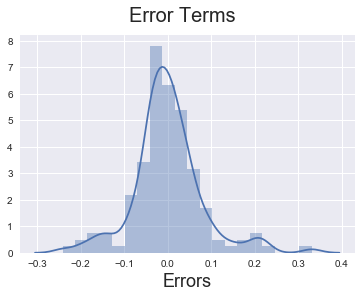

In [82]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Inference:
- All errors are normally distributed. Hence we can say, assumption of linear regression is meeting expectation.

### Prediction on Test data

#### Min max scalling of numeric variables

In [83]:
df_test[df_num.columns] = scaler.fit_transform(df_test[df_num.columns])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [84]:
# Create X and y train
y_test = df_test.price
X_test = df_test[X_train_rfe.columns]

In [85]:
#Add constant
X = sm.add_constant(X_test)

# create a fitted model in one line
lm_10 = sm.OLS(y_test,X).fit()

#Price prediction
y_pred_price = lm_10.predict(X)

### Evalution of Model

In [86]:
from sklearn.metrics import r2_score 
print("R Square on Test Data:",r2_score(y_test, y_pred_price))

R Square on Test Data: 0.833112930118


#### Plotting Graph to see distribution of y_test and y_pred_price

Text(0,0.5,'y_pred_price')

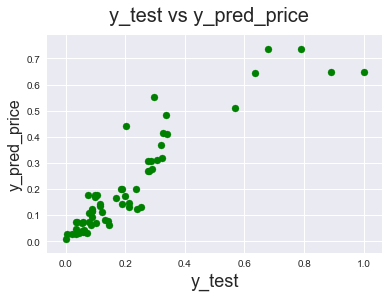

In [87]:
fig = plt.figure()
plt.scatter(y_test, y_pred_price, color='green')
fig.suptitle('y_test vs y_pred_price', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_price', fontsize = 16)    

#### Actual vs Predicted

Text(0,0.5,'Price')

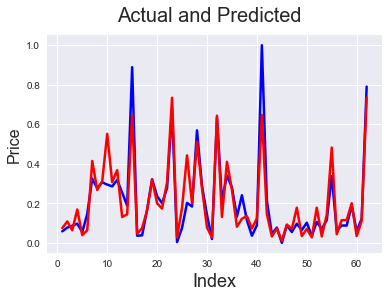

In [88]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_price, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label


#### Inference: Actual and predicted prices are nicely overlapping in above graph, which means model is predicting prices very well accurately.

#### Error Terms

Text(0,0.5,'ActualPrice-PredictedPrices')

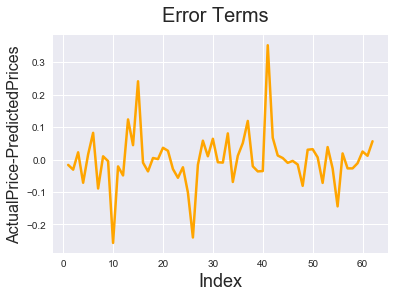

In [89]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred_price, color="orange", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ActualPrice-PredictedPrices', fontsize=16)                # Y-label

#### Inference: There is no pattern in error term graph, which means model is good and stable. Also there are very less scope for further improvement. 

### Summary:
- R-Square on Train data is 0.86, whereas on Test data is 0.83. Which means model is not underfitting or overfitting.

### Driver Variables: 
Below is the list of driver variables that **Geely Auto** needs to consider to decide not only price of car but also to attract USA customers.

**1. horsepower:** Horse power has positive correlation with price of a car. Which means higher the horse power then higher the price of a car

**2. price_range_luxuries:** People is USA prefers high end / luxuries car to buy. When we say luxuries/ high end car, means buyers prefer to have all basic plus advance ammenties in car.

**3. cylindernumber:** 
 - **Four:** If number of cylinders are 4 in car then Price of car is less.
 - **Twelve:** If number of cylinder are 12 in car then Price of car is high.

**4. carbody_hatchback:** As per graph above(boxplot), Price of hatch back cars are average which attracts customers to buy.

**5. enginetype_dohcv:** Buyers are preferring dohcv engine type

**6. enginelocation_rear:**	Buyers are preferring location of engine at rear
	
